# Second Problem - Universal Bank data

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

import pandasql as psql

In [2]:
# Load the loans data

bankdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\46 season 22-jul-2021\Universalbank.csv", header=0)
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']

In [4]:
# cols1 is variables - crating a dummy variables

cols1 = ['Family', 'Education']
print(cols1)

['Family', 'Education']


In [5]:
# cols2 variables - MinMaxScalar function

cols2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
print(cols2)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


In [6]:
# Create dummy variable for all range values

bankdata = pd.get_dummies(bankdata, columns=cols1)
bankdata.head().T

,0,1,2,3,4
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0


In [7]:
# Identify the dependent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [8]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

# SVM Algorithm

In [9]:
# Training the SVM algorithm 

from sklearn.svm import SVC

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelSVMGaussian.fit(x_train, y_train)

# Predicting the values

y_pred = modelSVMGaussian.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[   0  427]
 [   0 1073]]
Outcome Values : 
 0 427 0 1073
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       427
           0       0.72      1.00      0.83      1073

    accuracy                           0.72      1500
   macro avg       0.36      0.50      0.42      1500
weighted avg       0.51      0.72      0.60      1500

Accuracy : 71.5 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Balanced Accuracy : 50.0 %
MCC nan
roc_auc_score: 0.5


# RandomForest Algorithm

In [10]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                 criterion='entropy', max_depth=3, max_features='auto',
                                 max_leaf_nodes=None, max_samples=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=300,
                                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                 warm_start=False)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with test data set

y1_pred = modelRF.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y1_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

Confusion matrix : 
 [[  71  356]
 [  19 1054]]
Outcome Values : 
 71 356 19 1054
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 75.0 %
Precision : 78.9 %
Recall : 16.6 %
F1 Score : 0.275
Balanced Accuracy : 57.4 %
MCC 0.282
roc_auc_score: 0.574


# Decision Tree Algorithm

In [11]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                 max_depth=None, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y2_pred = modelDT.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y2_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

Confusion matrix : 
 [[177 250]
 [305 768]]
Outcome Values : 
 177 250 305 768
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.41      0.39       427
           0       0.75      0.72      0.73      1073

    accuracy                           0.63      1500
   macro avg       0.56      0.57      0.56      1500
weighted avg       0.64      0.63      0.64      1500

Accuracy : 63.0 %
Precision : 36.7 %
Recall : 41.5 %
F1 Score : 0.389
Balanced Accuracy : 56.6 %
MCC 0.126
roc_auc_score: 0.565


# Logistic Regression Algorithm

In [12]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y3_pred = modelLR.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

Confusion matrix : 
 [[  71  356]
 [  20 1053]]
Outcome Values : 
 71 356 20 1053
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.76      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 74.9 %
Precision : 78.0 %
Recall : 16.6 %
F1 Score : 0.274
Balanced Accuracy : 57.4 %
MCC 0.279
roc_auc_score: 0.574


# Naive Bayes Algorithm

In [13]:
# To build the 'Naive Bayes' model with random sampling

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

modelGNB = modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y4_pred = modelGNB.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y4_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

Confusion matrix : 
 [[  71  356]
 [  20 1053]]
Outcome Values : 
 71 356 20 1053
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.76      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 74.9 %
Precision : 78.0 %
Recall : 16.6 %
F1 Score : 0.274
Balanced Accuracy : 57.4 %
MCC 0.279
roc_auc_score: 0.574


# KNN Algorithm

In [14]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

modelKNN = KNeighborsClassifier(n_neighbors=5)

modelKNN.fit(x_train, y_train)

y5_pred = modelKNN.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y5_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

Confusion matrix : 
 [[ 74 353]
 [186 887]]
Outcome Values : 
 74 353 186 887
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.17      0.22       427
           0       0.72      0.83      0.77      1073

    accuracy                           0.64      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.59      0.64      0.61      1500

Accuracy : 64.1 %
Precision : 28.5 %
Recall : 17.3 %
F1 Score : 0.215
Balanced Accuracy : 50.0 %
MCC -0.0
roc_auc_score: 0.5


In [15]:
# "VotingClassifier” module in sklearn 

from sklearn.ensemble import VotingClassifier

Votemodel = VotingClassifier(estimators=[('lr', modelLR), ('dt', modelDT), ('gnb', modelGNB),
                                         ('rf', modelRF), ('knn', modelKNN)],
                             voting='hard', weights=[0.2, 0.15, 0.25, 0.25, 0.15], flatten_transform=False)
Votemodel.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('gnb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     n_estimators=300,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())],
                 flatten_transform=False,
                 weights=[0.2, 0.15, 0.25, 0.25, 0.15])

In [16]:
# Predict the model with test data set

y99_pred = Votemodel.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y99_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y99_pred), 3))

Confusion matrix : 
 [[  71  356]
 [  19 1054]]
Outcome Values : 
 71 356 19 1054
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 75.0 %
Precision : 78.9 %
Recall : 16.6 %
F1 Score : 0.275
Balanced Accuracy : 57.4 %
MCC 0.282
roc_auc_score: 0.574


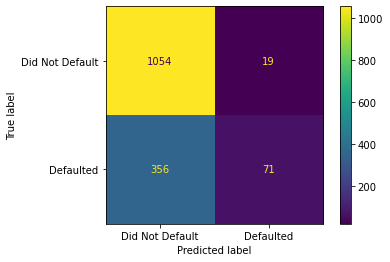

In [17]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(Votemodel, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [19]:
Results = pd.DataFrame({'NFPaid':y_test, 'NFPaid_Pred':y99_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = x_test_F1.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,NFPaid,NFPaid_Pred
1270,43,18,60,2.2,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1261,63,39,84,1.8,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1945,57,33,30,1.5,151,0,1,0,1,0,0,1,0,1,0,0,0,0
4239,62,36,60,2.2,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4094,53,23,8,0.4,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1832,54,29,79,3.8,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2948,44,18,14,0.1,98,0,0,0,0,0,1,0,0,0,0,1,1,0
765,47,21,109,1.8,0,1,0,0,0,0,0,0,1,1,0,0,0,0
828,35,9,28,1.0,75,0,0,0,1,0,0,0,1,1,0,0,0,0
1592,56,31,192,7.0,0,1,0,1,1,1,0,0,0,0,0,1,0,1
